In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("raw_movie_dataset.csv")

In [67]:
df.head()


,Movie Title,Genre,Rating,Production Company,Budget USD,Revenue USD,Profit USD,ROI %,Profit Margin %
0,Dangal,Drama,8.3,Aamir Khan Productions,10000000,300000000.0,290000000.0,2900,96.6
1,Pathaan,Action,5.9,Yash Raj Films,30000000,130000000.0,100000000.0,333.3,76.9
2,pathaan,action,5.9,YRF,30000000,130000000.0,100000000.0,333.3,76.9
3,Jawan,Action,7.0,Red Chillies Ent.,35000000,140000000.0,105000000.0,300,75.0
4,Stree 2,Comedy/Horror,7.5,Maddock Films,7000000,100000000.0,93000000.0,1328.5,93.0


In [68]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Title         100 non-null    object 
 1   Genre               97 non-null     object 
 2   Rating              96 non-null     float64
 3   Production Company  99 non-null     object 
 4   Budget USD          100 non-null    object 
 5   Revenue USD         97 non-null     float64
 6   Profit USD          98 non-null     float64
 7   ROI %               98 non-null     object 
 8   Profit Margin %     98 non-null     float64
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


,Rating,Revenue USD,Profit USD,Profit Margin %
count,96.000000,9.700000e+01,9.800000e+01,98.000000
mean,6.464583,5.167010e+07,3.580510e+07,39.039796
std,1.708430,5.487898e+07,5.175428e+07,98.331204
min,1.900000,2.000000e+06,-2.500000e+07,-650.000000
25%,5.500000,2.000000e+07,6.500000e+06,38.225000
50%,7.000000,3.500000e+07,2.400000e+07,70.400000
75%,7.825000,5.500000e+07,3.975000e+07,83.825000
max,8.400000,3.000000e+08,2.900000e+08,98.300000


In [69]:
df.isnull().sum()


Movie Title           0
Genre                 3
Rating                4
Production Company    1
Budget USD            0
Revenue USD           3
Profit USD            2
ROI %                 2
Profit Margin %       2
dtype: int64

In [70]:
df.dropna(inplace=True)


In [71]:
df.drop_duplicates(inplace=True)


In [72]:
rename_map = {
    "Budget USD": "Budget_USD",
    "Revenue USD": "Revenue_USD",
    "Profit USD": "Profit_USD",
    "ROI %": "ROI_Percentage",
    "Profit Margin %": "Profit_Margin_Percentage"
}
df.rename(columns=rename_map, inplace=True)

numeric_columns = [
    "Budget_USD", "Revenue_USD", "Profit_USD",
    "ROI_Percentage", "Profit_Margin_Percentage"
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [73]:
df["Calculated_Profit"] = df["Revenue_USD"] - df["Budget_USD"]


In [74]:
df.to_csv("Cleaned_Movie_Trends_Dataset.csv", index=False)


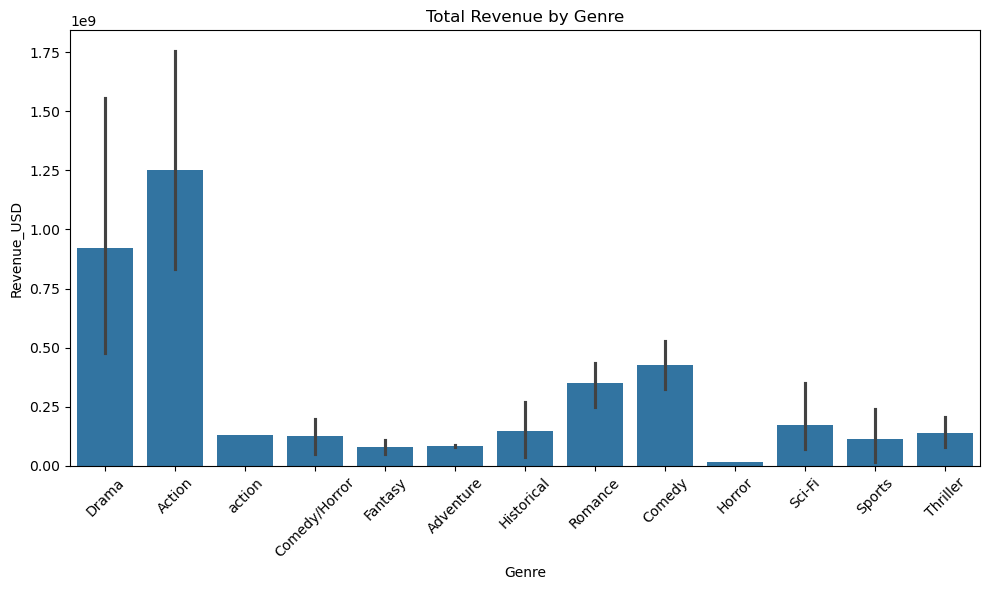

In [75]:
if "Revenue_USD" in df.columns:
	revenue_col_name = "Revenue_USD"
elif "Revenue USD" in df.columns:
	revenue_col_name = "Revenue USD"
else:
	raise KeyError("Column not found: neither 'Revenue_USD' nor 'Revenue USD' exists in df.columns")

plt.figure(figsize=(10,6))
sns.barplot(x="Genre", y=revenue_col_name, data=df, estimator=sum)
plt.title("Total Revenue by Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

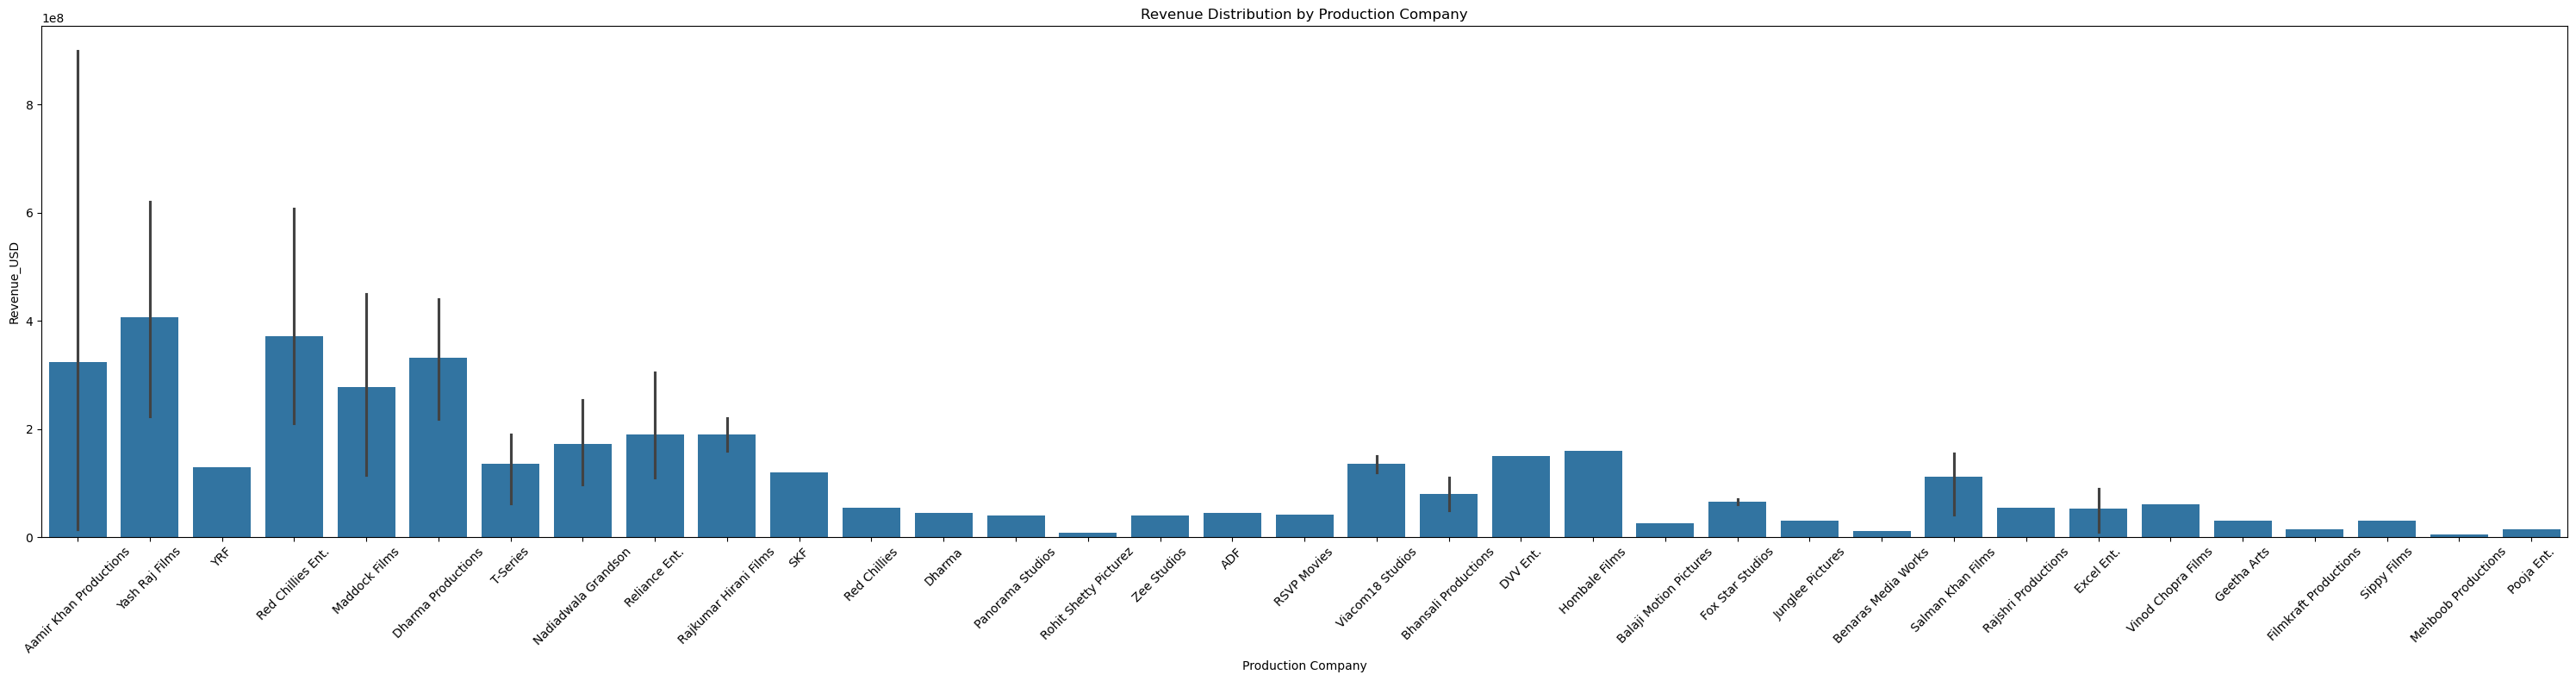

In [76]:
revenue_col = "Revenue_USD" if "Revenue_USD" in df.columns else "Revenue USD"

plt.figure(figsize=(30,8))
sns.barplot(
    x="Production Company",
    y=revenue_col,
    data=df,
    estimator=sum
)
plt.title("Revenue Distribution by Production Company")
plt.ylabel(revenue_col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


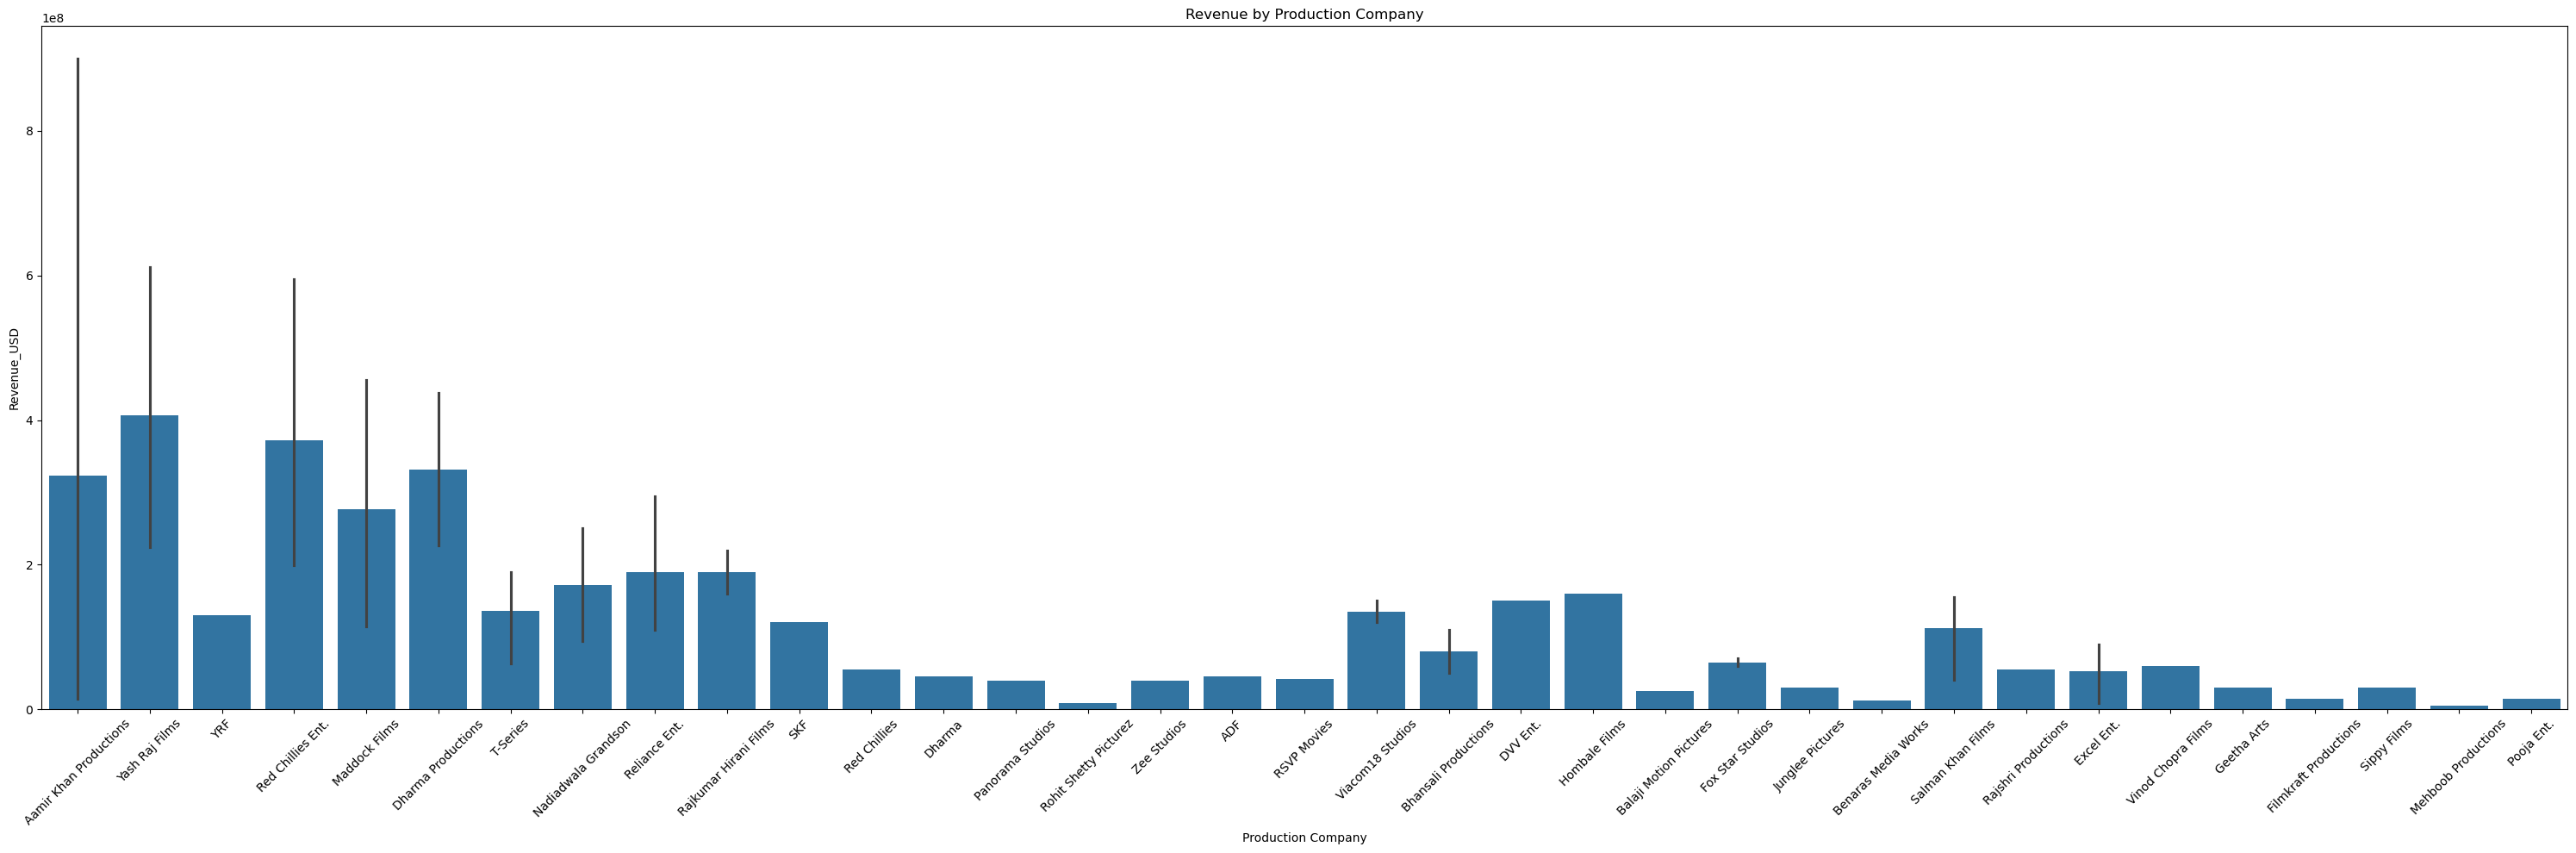

In [77]:
plt.figure(figsize=(30,10))
sns.barplot(
    x="Production Company",
    y=rev_col,
    data=df,
    estimator=sum
)
plt.title("Revenue by Production Company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


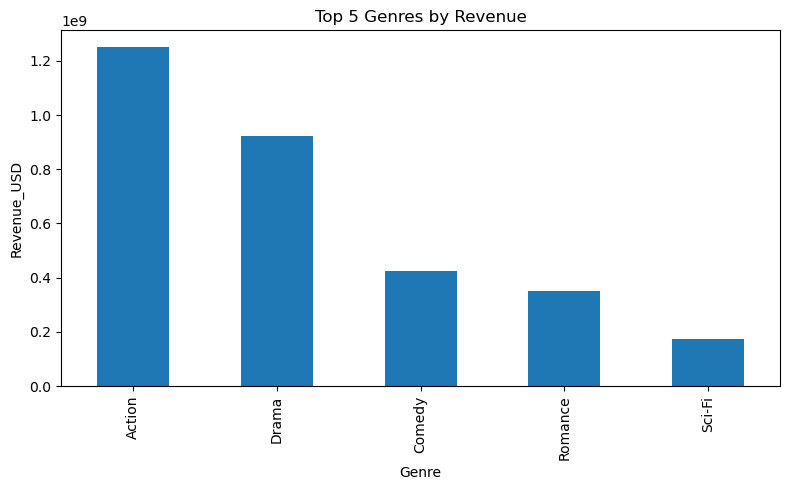

In [78]:
if "Revenue_USD" in df.columns:
    rev_col = "Revenue_USD"
elif "Revenue USD" in df.columns:
    rev_col = "Revenue USD"
else:
    raise KeyError("Column not found: neither 'Revenue_USD' nor 'Revenue USD' exists in df.columns")

top_genres = (
    df.groupby("Genre")[rev_col]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_genres.plot(kind="bar", figsize=(8,5), title="Top 5 Genres by Revenue")
plt.ylabel(rev_col)
plt.tight_layout()
plt.show()


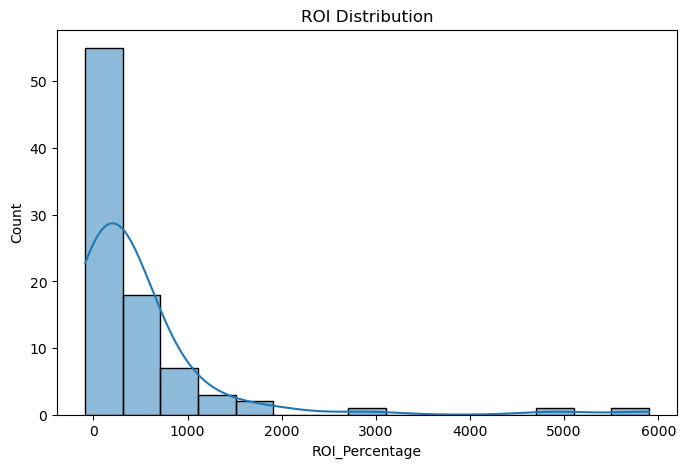

In [79]:
if "ROI_Percentage" in df.columns:
	roi_col = "ROI_Percentage"
elif "ROI %" in df.columns:
	roi_col = "ROI %"
else:
	raise KeyError("Column not found: neither 'ROI_Percentage' nor 'ROI %' exists in df.columns")

plt.figure(figsize=(8,5))

roi_series = pd.to_numeric(df[roi_col], errors='coerce')
sns.histplot(roi_series.dropna(), bins=15, kde=True)
plt.title("ROI Distribution")
plt.xlabel(roi_col)
plt.show()


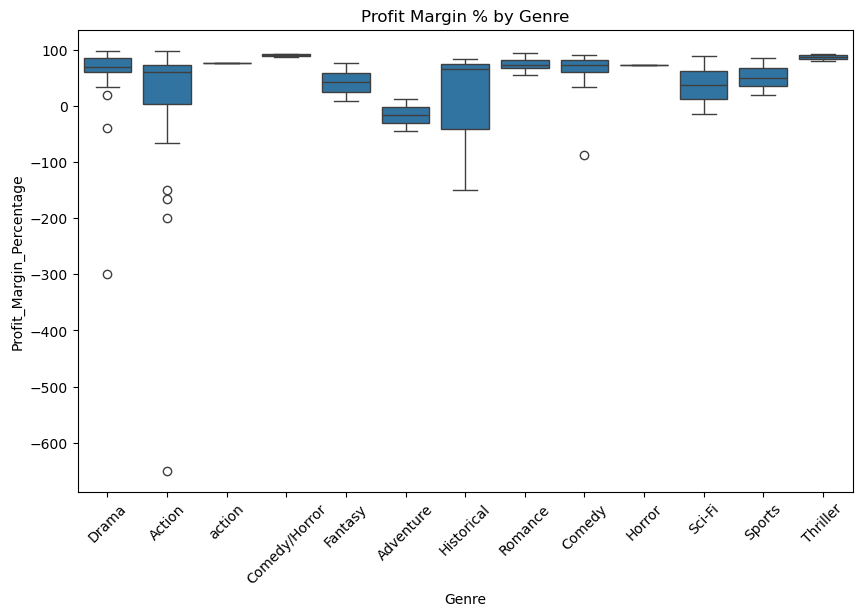

In [80]:
if "Profit_Margin_Percentage" in df.columns:
	y_col = "Profit_Margin_Percentage"
elif "Profit Margin %" in df.columns:
	y_col = "Profit Margin %"
else:
	raise KeyError("Column not found: neither 'Profit_Margin_Percentage' nor 'Profit Margin %' exists in df.columns")


df[y_col] = pd.to_numeric(df[y_col], errors='coerce')

plt.figure(figsize=(10,6))
sns.boxplot(x="Genre", y=y_col, data=df.dropna(subset=[y_col]))
plt.title("Profit Margin % by Genre")
plt.xticks(rotation=45)
plt.show()
